# DIP Implementations

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Reading Image

255


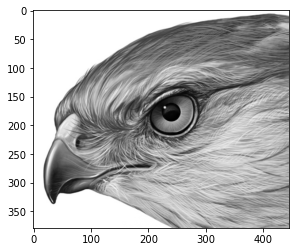

In [19]:
img = cv2.imread("hawk.png", cv2.IMREAD_GRAYSCALE)
#img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
plt.imshow(img, cmap = 'gray')

# Bit Plane Slicing

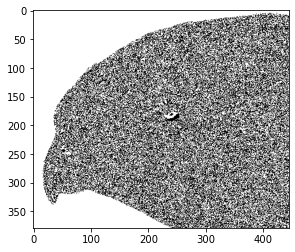

In [18]:
no = 4
image_bit = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        image_bit[i,j] = img[i, j] & no
plt.imshow(image_bit, cmap = 'gray')         

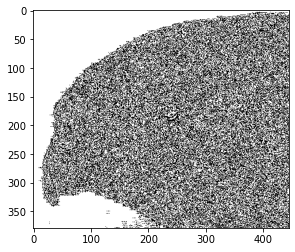

In [19]:
no = 2
image_bit = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        image_bit[i,j] = img[i, j] & no
plt.imshow(image_bit, cmap = 'gray')  

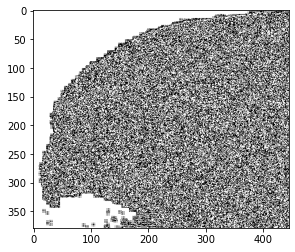

In [20]:
no = 1
image_bit = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        image_bit[i,j] = img[i, j] & no
plt.imshow(image_bit, cmap = 'gray')  

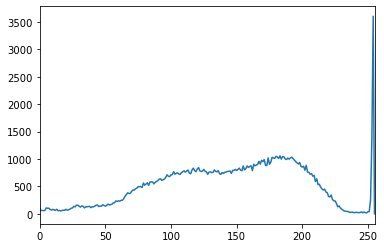

In [13]:
histr = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(histr)
plt.xlim([0,255])
plt.show()

# Contrast Streching

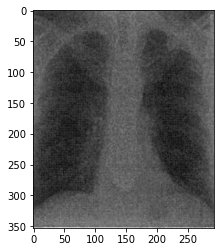

In [27]:
img = cv2.imread("x-ray.jpg", cv2.IMREAD_GRAYSCALE)
#img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
plt.imshow(img, cmap = 'gray')

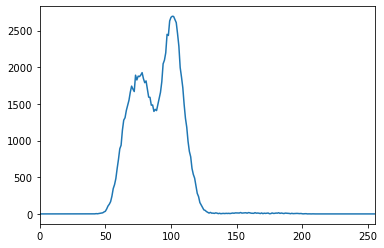

In [4]:
histr = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(histr)
plt.xlim([0,255])
plt.show()

In [16]:
a = 50
b = 130


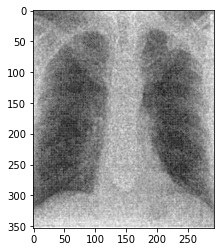

In [17]:
R = b - a
MP = 255
img_con = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if(img[i,j] > 0):
            img_con[i,j] = min(int(round(((img[i,j] - a)/R)*MP)),255) 
cv2.imwrite('img_con.jpg', img_con)           
plt.imshow(img_con, cmap = 'gray')  

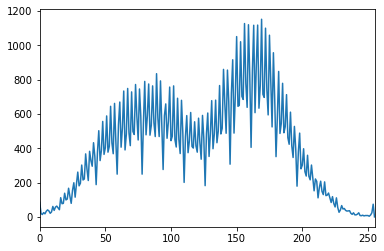

In [18]:
rgb = cv2.imread('img_con.jpg')
histr = cv2.calcHist([rgb],[0],None,[256],[0,255])
plt.plot(histr)
plt.xlim([0,255])
plt.show()

# Histogram Equalization

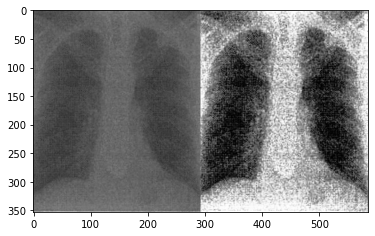

In [21]:
img = cv2.imread('x-ray.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.imshow(res, 'gray')

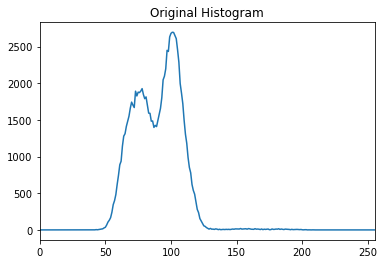

In [22]:
histr = cv2.calcHist([img],[0],None,[256],[0,255])
plt.title('Original Histogram')
plt.plot(histr)
plt.xlim([0,255])
plt.show()

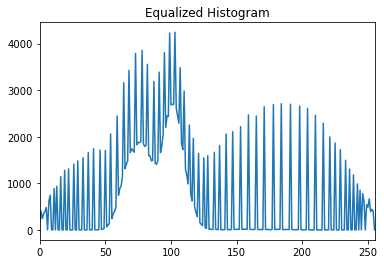

In [24]:
histr = cv2.calcHist([res],[0],None,[256],[0,255])
plt.title('Equalized Histogram')
plt.plot(histr)
plt.xlim([0,255])
plt.show()

In [35]:
from collections import defaultdict
def plot_pdf_cdf(img):
    
    d = defaultdict(int)
    
    total = img.shape[0]*img.shape[1]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            d[img[i][j]] += 1

    for i in range(256):
            d[i] = d[i]/total

    cdf = defaultdict(int)
    cdf[-1] = 0
    for key in range(256):
        cdf[key] = cdf[key-1] + d[key]

    keys = [i for i in range(256)]
    values = [d[i] for i in range(256)]
    
    plt.title("PDF of Original Image")
    plt.plot(keys, values)    
    plt.show()
    
    values = [cdf[i] for i in range(256)]
    
    plt.title("CDF of Original Image")
    plt.plot(keys, values)    
    plt.show()
    
    return cdf

# Implementation

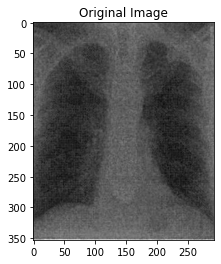

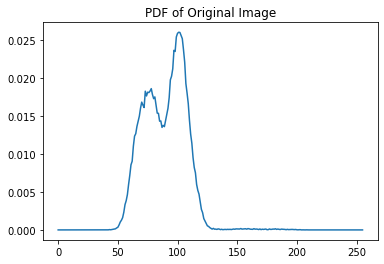

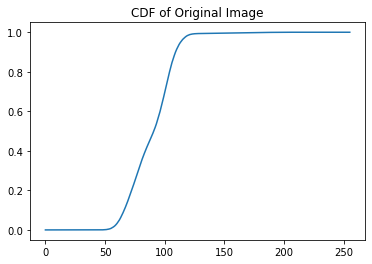

In [36]:
plt.title("Original Image")
plt.imshow(img, cmap = 'gray')
plt.show()

cdf = plot_pdf_cdf(img)

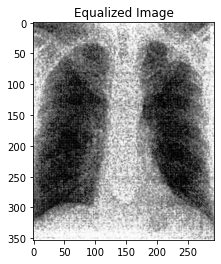

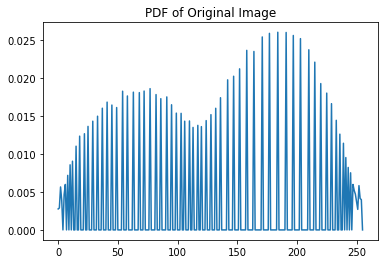

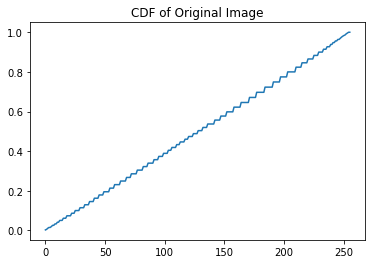

In [39]:
img_equalized = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_equalized[i][j] = int(255*cdf[img[i][j]])

plt.title("Equalized Image")
plt.imshow(img_equalized, cmap = 'gray')
plt.show()

cdf_new = plot_pdf_cdf(img_equalized)

# Image Thresholding

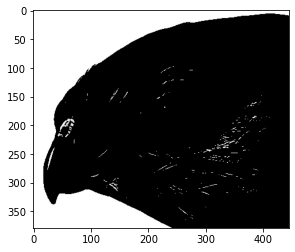

In [16]:
thre = 225
image_threshold = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] >= thre:
            image_threshold[i,j] = img[i, j] 
plt.imshow(image_threshold, cmap = 'gray') 

# Image Negative

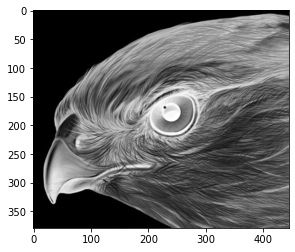

In [5]:
image_negative = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        image_negative[i,j] = 1 - img[i, j]
plt.imshow(image_negative, cmap = 'gray')        

In [12]:
img

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843],
       ...,
       [1.        , 1.        , 1.        , ..., 0.68235294, 0.67843137,
        0.67843137],
       [1.        , 1.        , 1.        , ..., 0.62352941, 0.62352941,
        0.62745098],
       [1.        , 1.        , 1.        , ..., 0.69411765, 0.68627451,
        0.67843137]])

In [13]:
img.shape

(379, 445)

# Low Pass Filter

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


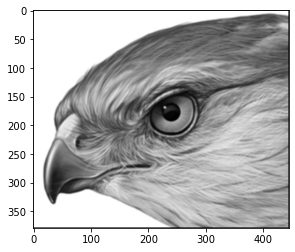

In [7]:
filtered_img = np.zeros(img.shape)
n = 3
m = 3
filter = np.ones((n, m))/(n*m)
sum = 0
print(filter)
for j in range((n//2), img.shape[0]-(n//2)):
    for k in range((m//2), img.shape[1]-(m//2)):
                filtered_img[j, k] = np.sum(img[j-(n//2):j+(n//2)+1, k-(m//2):k+(m//2)+1] * filter)
plt.imshow(filtered_img, cmap = 'gray')            

# High Pass Filter

## Laplacian Filter

[[ 0  1  0]
 [ 1 -8  1]
 [ 0  1  0]]


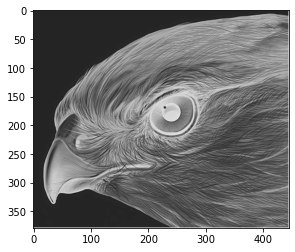

In [8]:
filtered_img = np.zeros(img.shape)
n = 3
m = 3
filter = np.array([[0,1,0],[1,-8,1],[0,1,0]])
sum = 0
print(filter)
for j in range((n//2), img.shape[0]-(n//2)):
    for k in range((m//2), img.shape[1]-(m//2)):
                filtered_img[j, k] = np.sum(img[j-(n//2):j+(n//2)+1, k-(m//2):k+(m//2)+1] * filter)
plt.imshow(filtered_img, cmap = 'gray')            

[[ 1  2  1]
 [ 1 -9  1]
 [ 1  2  1]]


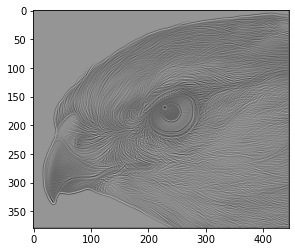

In [9]:
filtered_img = np.zeros(img.shape)
n = 3
m = 3
filter = np.array([[1,2,1],[1,-9,1],[1,2,1]])
sum = 0
print(filter)
for j in range((n//2), img.shape[0]-(n//2)):
    for k in range((m//2), img.shape[1]-(m//2)):
                filtered_img[j, k] = np.sum(img[j-(n//2):j+(n//2)+1, k-(m//2):k+(m//2)+1] * filter)
plt.imshow(filtered_img, cmap = 'gray')           

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


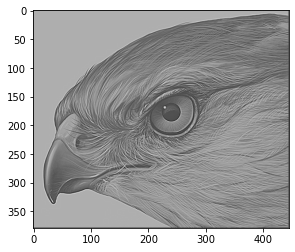

In [10]:
filtered_img = np.zeros(img.shape)
n = 3
m = 3
filter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sum = 0
print(filter)
for j in range((n//2), img.shape[0]-(n//2)):
    for k in range((m//2), img.shape[1]-(m//2)):
                filtered_img[j, k] = np.sum(img[j-(n//2):j+(n//2)+1, k-(m//2):k+(m//2)+1] * filter)
plt.imshow(filtered_img, cmap = 'gray')           

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  0.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


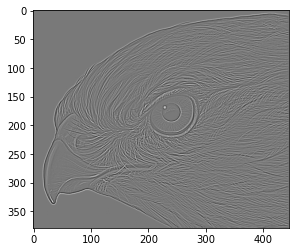

In [11]:
filtered_img = np.zeros(img.shape)
n = 3
m = 3
filter = -np.ones((n,m))/(n*m)
filter[n//2][m//2] = (n*m-1)/(n*m)
print(filter)
sum = 0
for j in range((n//2), img.shape[0]-(n//2)):
    for k in range((m//2), img.shape[1]-(m//2)):
                filtered_img[j, k] = np.sum(img[j-(n//2):j+(n//2)+1, k-(m//2):k+(m//2)+1] * filter)
plt.imshow(filtered_img, cmap = 'gray')           